
Dataset Head: 
     Country       City                      University  \
0        USA  Cambridge              Harvard University   
1         UK     London         Imperial College London   
2     Canada    Toronto           University of Toronto   
3  Australia  Melbourne         University of Melbourne   
4    Germany     Munich  Technical University of Munich   

                  Program   Level  Duration_Years  Tuition_USD  \
0        Computer Science  Master             2.0        55400   
1            Data Science  Master             1.0        41200   
2      Business Analytics  Master             2.0        38500   
3             Engineering  Master             2.0        42000   
4  Mechanical Engineering  Master             2.0          500   

   Living_Cost_Index  Rent_USD  Visa_Fee_USD  Insurance_USD  Exchange_Rate  
0               83.5      2200           160           1500           1.00  
1               75.8      1800           485            800           0.79  
2

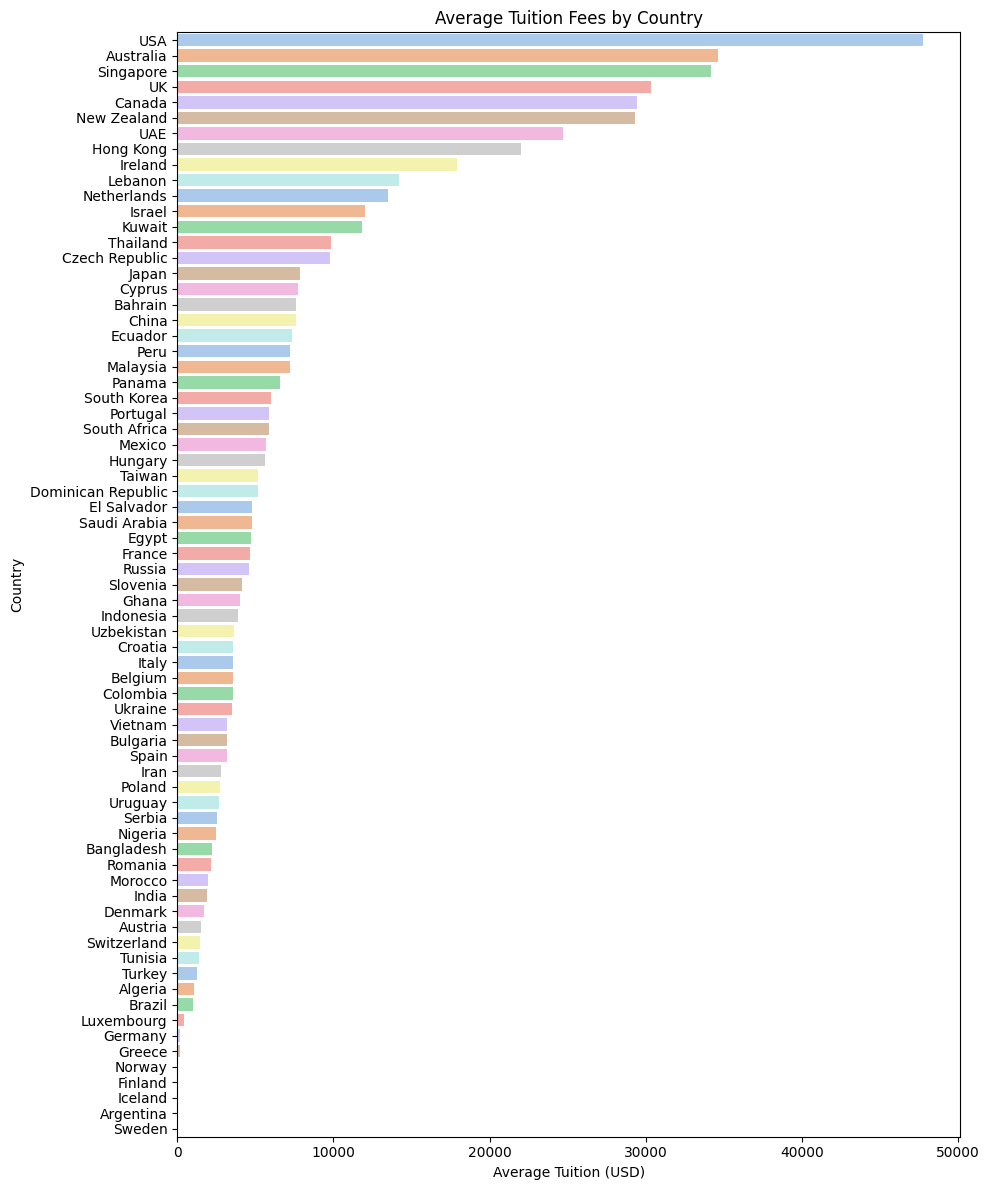

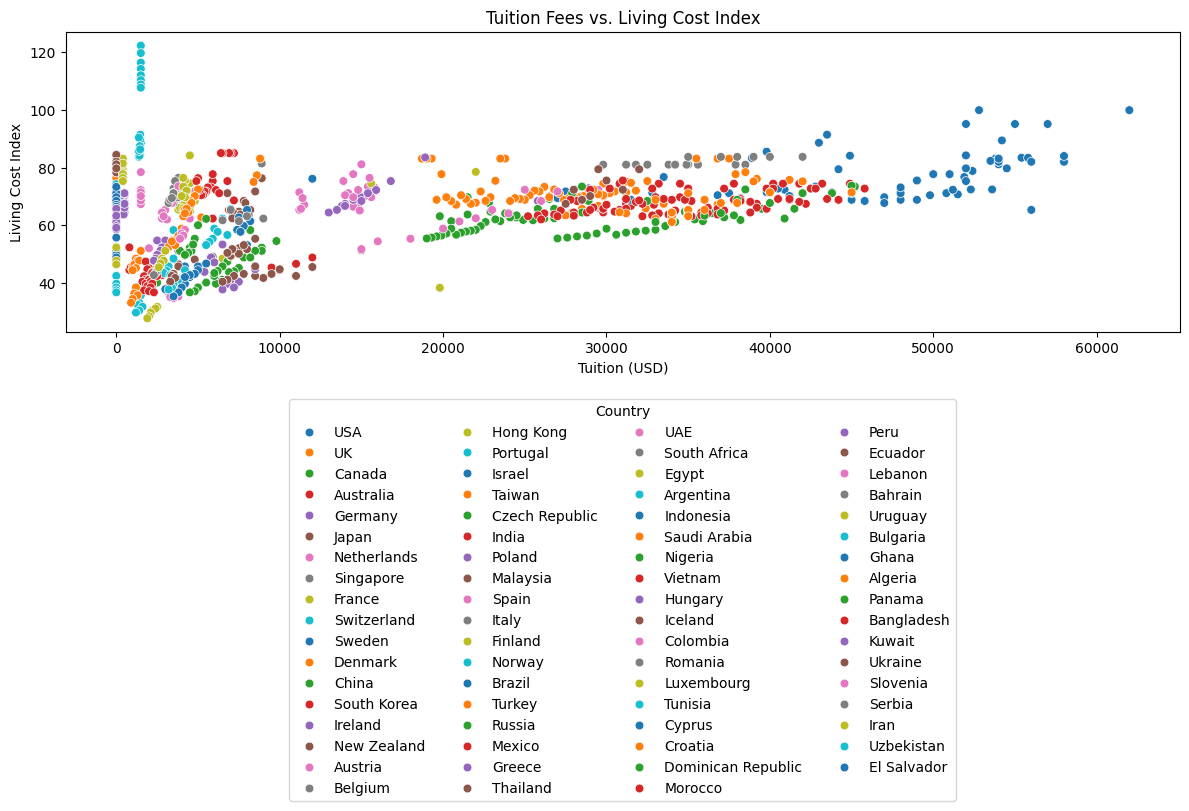

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

# ================================================ #
# #1. Exploratory Data Analysis and Data Cleaning  #
# ================================================ #

# Load the dataset
cost_int = pd.read_csv('International_Education_Costs.csv')

# Display the first few rows of the dataset 
print('\nDataset Head: ')
print(cost_int.head())

# Display basic information about the dataset
print('\nDataset Info: ')
print(cost_int.info())

print('\nDataset Describe: ')
print(cost_int.describe())

print('\nDataset Shape: ')
print(cost_int.shape)

# Check the columns exist in the DataFrame
print("The existing columns:", cost_int.columns)

# Create the total cost and binary target variable
cost_int["Total_Cost_USD"] = cost_int["Tuition_USD"] + cost_int["Duration_Years"] * (
    cost_int["Rent_USD"] * 12 + cost_int["Insurance_USD"] + cost_int["Visa_Fee_USD"]
)
cost_int["HighCost"] = (cost_int["Total_Cost_USD"] > cost_int["Total_Cost_USD"].median()).astype(int)

# Features and target
# Features and target
features = ["Country", "City", "University", "Program", "Level", "Duration_Years", "Tuition_USD",
            "Living_Cost_Index", "Rent_USD", "Visa_Fee_USD", "Insurance_USD", "Exchange_Rate"]
X = cost_int[features]
y = cost_int["HighCost"]

# Missing values
print('\nMissing Value: ')
print(cost_int.isnull().sum())

# Descriptive statistics
print('\nDescriptive statistics: ')
desc_stats = cost_int.describe(include='all').T
print(desc_stats)

# Data distribution
print('\nData distribution: ')
distribution_stats = cost_int.select_dtypes(include=[np.number]).agg(['mean', 'median', 'std', 'min', 'max', 'skew', 'kurt']).T
print(distribution_stats)

# Class balance
print('\nClass balance: ')
class_balance = cost_int["HighCost"].value_counts()
print(class_balance)

# Correlation with target
print('\nCorrelation with target: ')
correlations = cost_int.select_dtypes(include=[np.number]).corr()["HighCost"].sort_values(ascending=False)
print(correlations)

# Duplicates
print('\nDuplicates: ')
duplicate_count = cost_int.duplicated().sum()
print(duplicate_count)

# --- EDA & Plot Average Tuition Fees by Country ---
# Plotting the distribution of the target variable
avg_fee=cost_int.groupby("Country")["Tuition_USD"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 12))
sns.barplot(x=avg_fee.values, y=avg_fee.index, palette='pastel')
plt.title('Average Tuition Fees by Country')
plt.xlabel('Average Tuition (USD)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# --- EDA & Plot Tuition Fees vs. Living Cost Index by Country --- #
plt.figure(figsize=(12, 9))
sns.scatterplot(data=cost_int, x='Tuition_USD', y='Living_Cost_Index', hue='Country', s=40, palette='tab10', legend='full')
plt.title('Tuition Fees vs. Living Cost Index')
plt.xlabel('Tuition (USD)')
plt.ylabel('Living Cost Index')

# Move legend to the bottom
plt.legend(title='Country', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4)
plt.tight_layout()
plt.show()

In [ ]:
# ================================= #
# 2. Preprocessing
# ================================= #

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Separate categorical and numerical features
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["number"]).columns.tolist()

# Impute numerical
num_imputer = SimpleImputer(strategy="median")
X_num = pd.DataFrame(num_imputer.fit_transform(X[numerical_cols]), columns=numerical_cols)

# Standard scale numerical
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=numerical_cols)

# One-hot encode categorical
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_cat_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Combine processed data
X_processed = pd.concat([X_num_scaled.reset_index(drop=True), X_cat_encoded.reset_index(drop=True)], axis=1)


Note: you may need to restart the kernel to use updated packages.

Model Performance:
0:
  Best Params: {'C': 10}
  Accuracy: 0.9835
  F1 Score: 0.9835
  Precision: 0.9836
  Recall: 0.9835
  ROC AUC: 0.9989

1:
  Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
  Accuracy: 0.9835
  F1 Score: 0.9835
  Precision: 0.9836
  Recall: 0.9835
  ROC AUC: 0.9969

2:
  Best Params: {'C': 1, 'kernel': 'linear'}
  Accuracy: 0.9780
  F1 Score: 0.9780
  Precision: 0.9783
  Recall: 0.9780
  ROC AUC: 0.9986

3:
  Best Params: {'max_depth': 10, 'n_estimators': 200}
  Accuracy: 0.9560
  F1 Score: 0.9560
  Precision: 0.9563
  Recall: 0.9560
  ROC AUC: 0.9942

Model Comparison Results:


,Model,Best Params,Accuracy,F1 Score,Precision,Recall,ROC AUC
0,LogisticRegression,{'C': 10},0.983516,0.983516,0.983575,0.983516,0.998913
1,GradientBoosting,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.983516,0.983516,0.983575,0.983516,0.99686
2,SVM,"{'C': 1, 'kernel': 'linear'}",0.978022,0.978019,0.978253,0.978022,0.998551
3,RandomForest,"{'max_depth': 10, 'n_estimators': 200}",0.956044,0.956039,0.956264,0.956044,0.994204


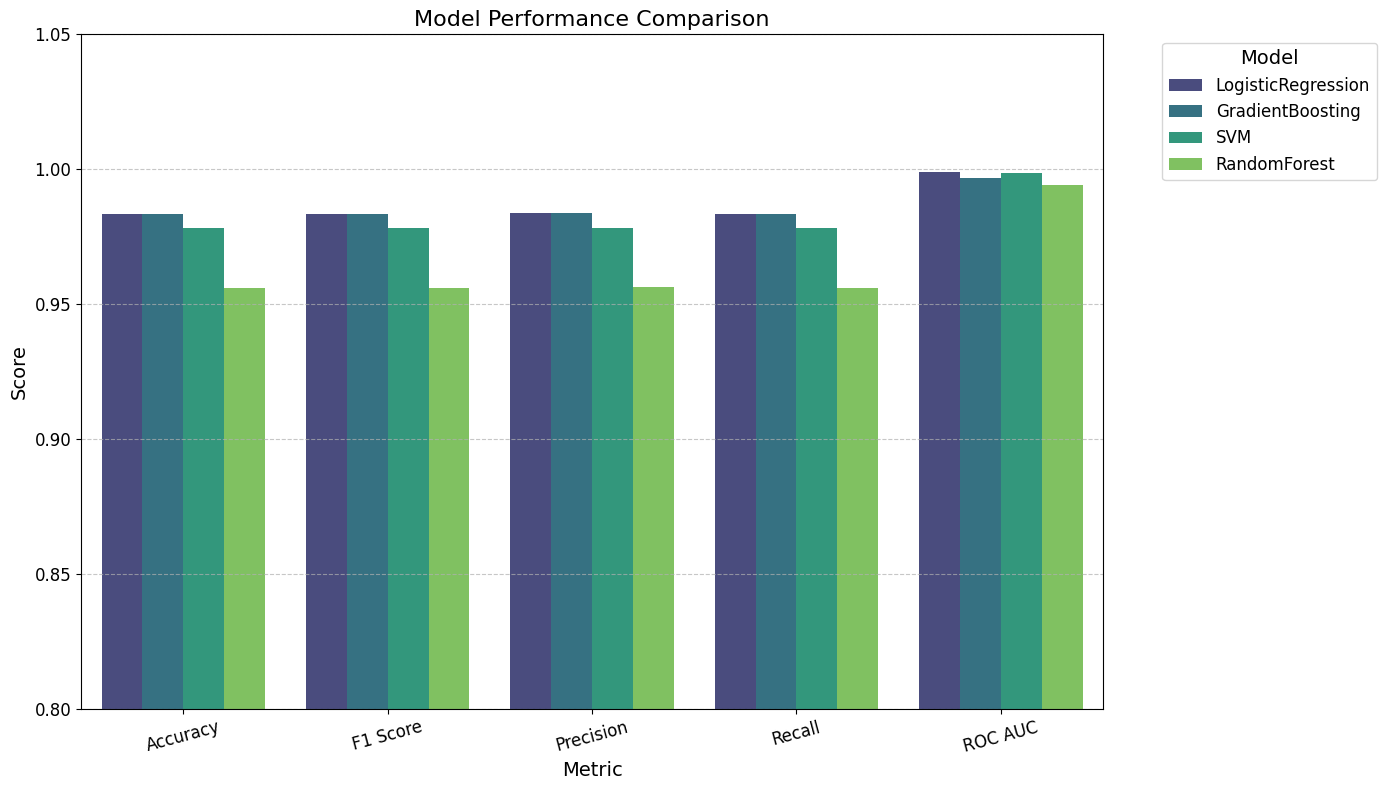


Top Features by Model:

Top 10 Features by Importance for Each Model:

▶ Logistic Regression
  Tuition_USD                                6.8648
  Rent_USD                                   5.8316
  Duration_Years                             2.8699
  Country_Canada                             2.3838
  University_University of Amsterdam        -1.9220
  Level_Master                              -1.9093
  Country_UAE                                1.7303
  Program_Artificial Intelligence           -1.4332
  Level_PhD                                  1.3857
  University_University of Lille             1.2557
------------------------------------------------------------
▶ Random Forest
  Tuition_USD                                0.1504
  Insurance_USD                              0.1165
  Living_Cost_Index                          0.1071
  Visa_Fee_USD                               0.0837
  Exchange_Rate                              0.0675
  Rent_USD                                   0.06

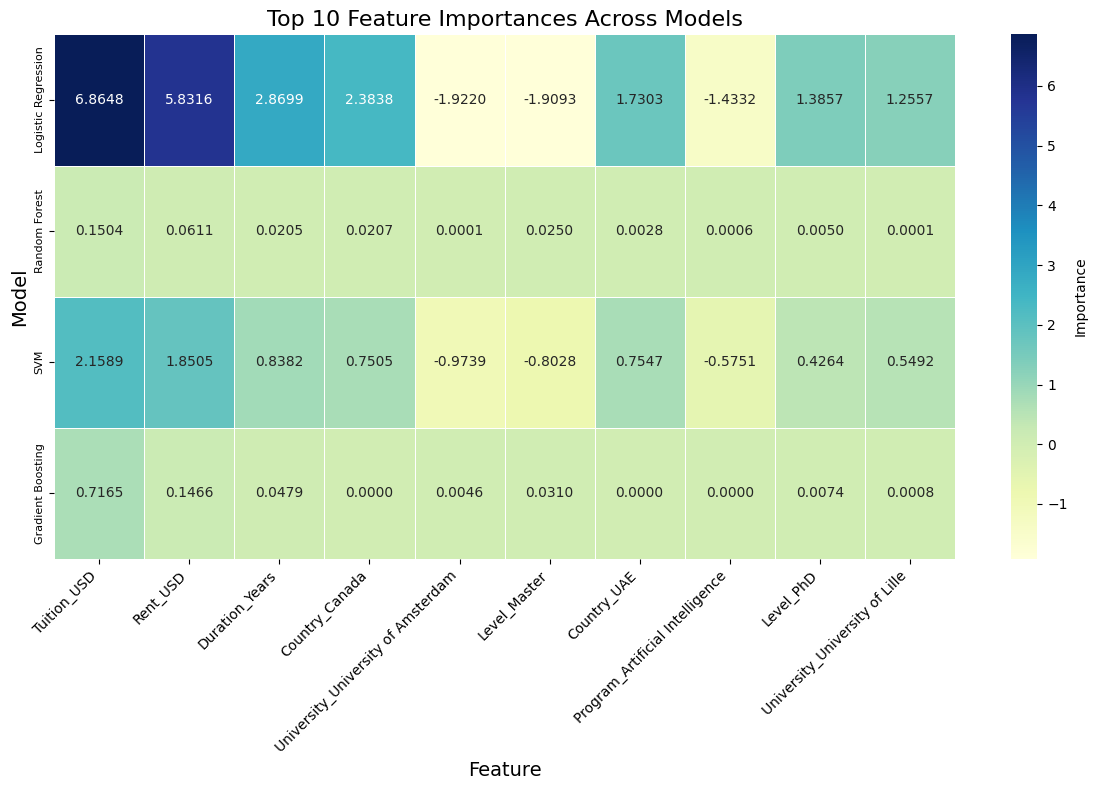

In [17]:

# ============================================ #
# #3. Experiment four machine learning models  #
# ============================================ #

%pip install seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import auc
import seaborn as sns


# Split the data into a training 80% and a testing sets 20%
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Step 4: Train 4 models with Grid Search
models = {
    "LogisticRegression": (LogisticRegression(max_iter=1000), {
        "C": [0.01, 0.1, 1, 10]
    }),
    "RandomForest": (RandomForestClassifier(), {
        "n_estimators": [100, 200],
        "max_depth": [5, 10]
    }),
    "SVM": (SVC(), {
        "C": [0.1, 1],
        "kernel": ["linear", "rbf"]
    }),
    "GradientBoosting": (GradientBoostingClassifier(), {
        "n_estimators": [50, 100],
        "learning_rate": [0.05, 0.1], 'max_depth': [2, 3]
    })
}

# Run GridSearchCV for all models
results = {}

for name, (model, param_grid) in models.items():
    grid = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    
    # For ROC AUC (need probability or decision function)
    if hasattr(grid, "predict_proba"):
        y_proba = grid.predict_proba(X_test)[:, 1]
    else:
        y_proba = grid.decision_function(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results[name] = {
        "Best Params": grid.best_params_,
        "Accuracy": accuracy,
        "F1 Score": report["weighted avg"]["f1-score"],
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "ROC AUC": roc_auc
        }

# Convert "Best Params" dictionaries to strings for compatibility
for model_name in results:
    results[model_name]["Best Params"] = str(results[model_name]["Best Params"])

# Convert to DataFrame and sort by accuracy
results_df = pd.DataFrame(results).T.sort_values(by="Accuracy", ascending=False)

results_df = results_df.reset_index().rename(columns={'index': 'Model'})[['Model']
             + [col for col in results_df.columns if col != 'Model']]
# Print results
print("\nModel Performance:")
for model_name, result in results_df.iterrows():
    print(f"{model_name}:")
    print(f"  Best Params: {result['Best Params']}")
    print(f"  Accuracy: {result['Accuracy']:.4f}")
    print(f"  F1 Score: {result['F1 Score']:.4f}")
    print(f"  Precision: {result['Precision']:.4f}")
    print(f"  Recall: {result['Recall']:.4f}")
    print(f"  ROC AUC: {result['ROC AUC']:.4f}\n")

print("Model Comparison Results:")
display(results_df)

# === Prepare data for plotting === #
melted = results_df.melt(id_vars="Model", value_vars=["Accuracy", "F1 Score", "Precision", "Recall", "ROC AUC"],
                         var_name="Metric", value_name="Score")

# === Plotting Model Performance Comparison as Bar Chart === #
plt.figure(figsize=(14, 8))
sns.barplot(data=melted, x="Metric", y="Score", hue="Model", palette="viridis")

plt.title("Model Performance Comparison", fontsize=16)
plt.ylabel("Score", fontsize=14)
plt.xlabel("Metric", fontsize=14)
plt.ylim(0.8, 1.05)
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Model", fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# === Feature Importances === #
# Fit models with best-known parameters
log_reg = LogisticRegression(C=10, max_iter=1000).fit(X_train, y_train)
rf = RandomForestClassifier(max_depth=10, n_estimators=100).fit(X_train, y_train)
svm = SVC(C=1, kernel="linear", probability=True).fit(X_train, y_train)
gb = GradientBoostingClassifier(learning_rate=0.05, max_depth=3, n_estimators=100).fit(X_train, y_train)

# Extract feature names
features = X_train.columns.tolist()

# Compile feature importance data
importance_df = pd.DataFrame({
    "Feature": features,
    "Logistic Regression": log_reg.coef_[0],
    "Random Forest": rf.feature_importances_,
    "SVM": svm.coef_[0],
    "Gradient Boosting": gb.feature_importances_
})

# Identify top 10 features by average absolute importance
top_features = importance_df.set_index("Feature").abs().mean(axis=1).sort_values(ascending=False).head(10).index
plot_df = importance_df.set_index("Feature").loc[top_features].T

# Print top features for each model
print("\nTop Features by Model:")
print("\nTop 10 Features by Importance for Each Model:\n")

for model in ["Logistic Regression", "Random Forest", "SVM", "Gradient Boosting"]:
    print(f"▶ {model}")
    sorted_feats = importance_df[["Feature", model]].copy()
    sorted_feats["abs_importance"] = sorted_feats[model].abs()
    top_sorted = sorted_feats.sort_values(by="abs_importance", ascending=False).head(10)
    for _, row in top_sorted.iterrows():
        print(f"  {row['Feature']:<40} {row[model]:>8.4f}")
    print("-" * 60)


# Plot comparison of top 10 feature importances across models using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(plot_df, annot=True, fmt=".4f", cmap="YlGnBu", cbar_kws={'label': 'Importance'}, linewidths=0.5)
plt.title("Top 10 Feature Importances Across Models", fontsize=16)
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

